In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/PC/02_Forward School/Capstone Project-Alcon Marshall/00_Datasets/05 Food Price/producer-prices_mys.csv")

In [90]:
df

,Iso3,StartDate,EndDate,Area Code,Area Code (M49),Area,Item Code,Item Code (CPC),Item,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag
0,#country+code,#date+start,#date+end,NaN,NaN,#country+name,#indicator+code,NaN,#indicator+name,NaN,NaN,NaN,#date+year,NaN,NaN,#indicator+type,#indicator+value+num,NaN
1,MYS,1991-01-01,1991-12-31,131.0,'458,Malaysia,226,'01379.01,Areca nuts,5539.0,Producer Price Index (2014-2016 = 100),1991.0,1991,7021.0,Annual value,NaN,43.060000,I
2,MYS,1992-01-01,1992-12-31,131.0,'458,Malaysia,226,'01379.01,Areca nuts,5539.0,Producer Price Index (2014-2016 = 100),1992.0,1992,7021.0,Annual value,NaN,43.300000,I
3,MYS,1993-01-01,1993-12-31,131.0,'458,Malaysia,226,'01379.01,Areca nuts,5539.0,Producer Price Index (2014-2016 = 100),1993.0,1993,7021.0,Annual value,NaN,43.910000,I
4,MYS,1994-01-01,1994-12-31,131.0,'458,Malaysia,226,'01379.01,Areca nuts,5539.0,Producer Price Index (2014-2016 = 100),1994.0,1994,7021.0,Annual value,NaN,44.590000,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11595,MYS,2020-01-01,2020-12-31,131.0,'458,Malaysia,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2020.0,2020,7021.0,Annual value,NaN,114.070000,I
11596,MYS,2021-01-01,2021-12-31,131.0,'458,Malaysia,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2021.0,2021,7021.0,Annual value,NaN,127.450000,I
11597,MYS,2022-01-01,2022-12-31,131.0,'458,Malaysia,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2022.0,2022,7021.0,Annual value,NaN,149.720000,I
11598,MYS,2023-01-01,2023-12-31,131.0,'458,Malaysia,1800,'F1800,"Vegetables&Melons, Total",5539.0,Producer Price Index (2014-2016 = 100),2023.0,2023,7021.0,Annual value,NaN,138.680000,I


In [92]:
print(df["Item"].unique())

['#indicator+name' 'Areca nuts' 'Asparagus' 'Bananas' 'Bananas cavendish'
 'Cabbages' 'Carrots and turnips' 'Cashew nuts, in shell' 'Cassava, fresh'
 'Cauliflowers and broccoli'
 'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw'
 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)'
 'Cloves (whole stems), raw' 'Cocoa beans' 'Coconuts, in shell'
 'Coffee, green' 'Cucumbers and gherkins'
 'Edible roots and tubers with high starch or inulin content, n.e.c., fresh'
 'Eggplants (aubergines)' 'Eggs from other birds in shell, fresh, n.e.c.'
 'Ginger, raw' 'Green corn (maize)' 'Groundnuts, excluding shelled'
 'Hen eggs in shell, fresh' 'Horse meat, fresh or chilled'
 'Horse meat, fresh or chilled (biological)'
 'Leeks and other alliaceous vegetables' 'Lemons and limes'
 'Lettuce and chicory' 'Maize (corn)' 'Mangoes, guavas and mangosteens'
 'Meat of buffalo, fresh or chilled'
 'Meat of buffalo, fresh or chilled (biological)'
 'Meat of cattle with the bone, fresh or chill

<Figure size 1200x600 with 0 Axes>

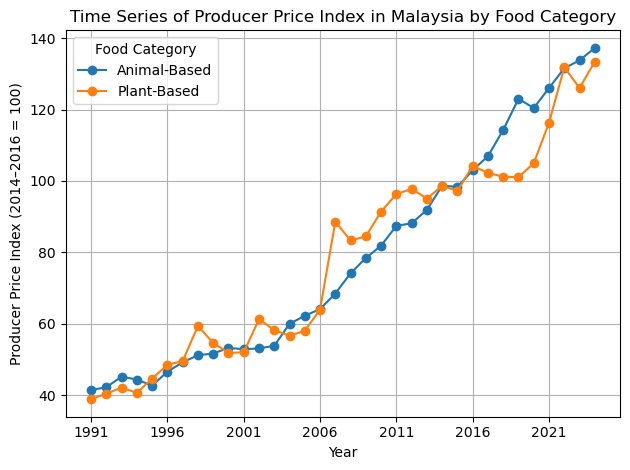

In [102]:
# Filter only Producer Price Index entries
df = df[df['Element'] == 'Producer Price Index (2014-2016 = 100)'].copy()

# Convert 'Value' to numeric and drop invalid entries
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value', 'Year'])

# -------------------------------
# Classify Items by Food Category
# -------------------------------

# Define detailed keywords
plant_keywords = [
    "vegetable", "legume", "fruit", "cruciferous", "greens", "beans",
    "nuts", "seeds", "herb", "spices", "whole grain", "maize", "cassava", "ginger",
    "lettuce", "mangoes", "cabbages", "carrots", "broccoli", "cucumbers",
    "cauliflowers", "bananas", "eggplants", "leeks", "coffee", "cocoa", "coconut",
    "pepper", "asparagus", "corn", "turnips", "chillies", "onion", "garlic"
]

animal_keywords = [
    "meat", "egg", "milk", "dairy", "livestock", "buffalo", "cattle", "chicken", "duck", "goat", "pig", "horse"
]

# Categorization function
def classify_item(item):
    item_lower = str(item).lower()
    if any(k in item_lower for k in plant_keywords):
        return "Plant-Based"
    elif any(k in item_lower for k in animal_keywords):
        return "Animal-Based"
    else:
        return "Other"

# Apply classification
df['Category'] = df['Item'].apply(classify_item)

# -------------------------------
# Aggregate by Year and Category
# -------------------------------
grouped = df[df['Category'].isin(["Plant-Based", "Animal-Based"])]
trend_data = grouped.groupby(['Year', 'Category'])['Value'].mean().unstack()

# -------------------------------
# Plotting
# -------------------------------
plt.figure(figsize=(12, 6))
trend_data.plot(marker='o')
plt.title("Time Series of Producer Price Index in Malaysia by Food Category")
plt.ylabel("Producer Price Index (2014–2016 = 100)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Food Category")
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/PC/02_Forward School/Capstone Project/00_Datasets/05 Food Price/producer-prices_mys.csv")

# Filter for Producer Price Index data
df = df[df['Element'] == 'Producer Price Index (2014-2016 = 100)'].copy()

# Clean the 'Value' column
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value', 'Year'])

# Define food category keywords
plant_keywords = [
    "vegetable", "legume", "fruit", "cruciferous", "greens", "beans",
    "nuts", "seeds", "herb", "spices", "whole grain", "maize", "cassava", "ginger",
    "lettuce", "mangoes", "cabbages", "carrots", "broccoli", "cucumbers",
    "cauliflowers", "bananas", "eggplants", "leeks", "coffee", "cocoa", "coconut",
    "pepper", "asparagus", "corn", "turnips", "chillies", "onion", "garlic"
]
animal_keywords = [
    "meat", "egg", "milk", "dairy", "livestock", "buffalo", "cattle", "chicken", "duck", "goat", "pig", "horse"
]

# Classify each item
def classify_item(item):
    item_lower = str(item).lower()
    if any(k in item_lower for k in plant_keywords):
        return "Plant-Based"
    elif any(k in item_lower for k in animal_keywords):
        return "Animal-Based"
    else:
        return "Other"

df['Category'] = df['Item'].apply(classify_item)

# Filter only plant and animal-based entries
filtered_df = df[df['Category'].isin(['Plant-Based', 'Animal-Based'])]

avg_price_by_commodity.head(20).reset_index(drop=True).style \
    .format({"Value": "{:.2f}"}) \
    .background_gradient(cmap="YlOrRd", subset="Value") \
    .set_caption("Top 20 Commodities by Average Producer Price Index")


,Item,Category,Value
0,"Meat of buffalo, fresh or chilled",Animal-Based,122.15
1,Lettuce and chicory,Plant-Based,118.74
2,Bananas cavendish,Plant-Based,114.46
3,Carrots and turnips,Plant-Based,106.27
4,Green corn (maize),Plant-Based,99.85
5,Other bananas (excluding cavendish and cooking bananas),Plant-Based,99.46
6,Cabbages,Plant-Based,97.92
7,Cauliflowers and broccoli,Plant-Based,96.91
8,"Meat of sheep, fresh or chilled",Animal-Based,94.39
9,"Other citrus fruit, n.e.c.",Plant-Based,87.98


In [85]:
# Load and clean dataset
df = pd.read_csv("C:/Users/PC/02_Forward School/Capstone Project/00_Datasets/05 Food Price/producer-prices_mys.csv")
df = df[df['Element'] == 'Producer Price Index (2014-2016 = 100)'].copy()
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value', 'Year'])

# Classify items
plant_keywords = [
    "vegetable", "legume", "fruit", "cruciferous", "greens", "beans",
    "nuts", "seeds", "herb", "spices", "whole grain", "maize", "cassava", "ginger",
    "lettuce", "mangoes", "cabbages", "carrots", "broccoli", "cucumbers",
    "cauliflowers", "bananas", "eggplants", "leeks", "coffee", "cocoa", "coconut",
    "pepper", "asparagus", "corn", "turnips", "chillies", "onion", "garlic"
]
animal_keywords = [
    "meat", "egg", "milk", "dairy", "livestock", "buffalo", "cattle", "chicken", "duck", "goat", "pig", "horse"
]

def classify_item(item):
    item_lower = str(item).lower()
    if any(k in item_lower for k in plant_keywords):
        return "Plant-Based"
    elif any(k in item_lower for k in animal_keywords):
        return "Animal-Based"
    else:
        return "Other"

df['Category'] = df['Item'].apply(classify_item)
filtered_df = df[df['Category'].isin(['Plant-Based', 'Animal-Based'])]

# Calculate volatility = standard deviation of price index over years
volatility_df = (
    filtered_df.groupby(['Item', 'Category'])['Value']
    .std()
    .reset_index()
    .rename(columns={'Value': 'Volatility'})
    .sort_values(by='Volatility', ascending=False)
)

# Optional: round for display
volatility_df['Volatility'] = volatility_df['Volatility'].round(2)

# Display top 20 most volatile commodities
from IPython.display import display

# Styled volatility table with gradient coloring
display(
    volatility_df.head(20).reset_index(drop=True).style
        .format({"Volatility": "{:.2f}"})
        .background_gradient(cmap="YlOrRd", subset="Volatility")
        .set_caption("Top 20 Commodities by Price Volatility (Standard Deviation)"))


,Item,Category,Volatility
0,"Meat of buffalo, fresh or chilled",Animal-Based,84.83
1,Oil palm fruit,Plant-Based,57.43
2,"Meat of sheep, fresh or chilled",Animal-Based,55.81
3,Lettuce and chicory,Plant-Based,52.01
4,"Meat of buffalo, fresh or chilled (biological)",Animal-Based,47.01
5,"Coconuts, in shell",Plant-Based,45.00
6,"Meat of cattle with the bone, fresh or chilled (biological)",Animal-Based,40.85
7,"Meat of sheep, fresh or chilled (biological)",Animal-Based,40.79
8,"Horse meat, fresh or chilled",Animal-Based,39.73
9,"Horse meat, fresh or chilled (biological)",Animal-Based,39.72


In [96]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/PC/02_Forward School/Capstone Project/00_Datasets/05 Food Price/producer-prices_mys.csv")

# Filter for relevant element
df = df[df['Element'] == 'Producer Price Index (2014-2016 = 100)'].copy()
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df.dropna(subset=['Value', 'Year'])

# Define keyword-based classification rules
plant_keywords = [
    "vegetable", "legume", "fruit", "cruciferous", "greens", "beans",
    "nuts", "seeds", "herb", "spices", "whole grain", "maize", "cassava", "ginger",
    "lettuce", "mangoes", "cabbages", "carrots", "broccoli", "cucumbers",
    "cauliflowers", "bananas", "eggplants", "leeks", "coffee", "cocoa", "coconut",
    "pepper", "asparagus", "corn", "turnips", "chillies", "onion", "garlic", "okra",
    "spinach", "sweet potatoes", "yams", "rice", "tea", "tomatoes", "tobacco", "pumpkins", "papayas"
]
animal_keywords = [
    "meat", "egg", "milk", "dairy", "livestock", "buffalo", "cattle", "chicken",
    "duck", "goat", "pig", "horse", "wool"
]

# Classification function
def classify_item(item):
    item_lower = str(item).lower()
    if any(k in item_lower for k in plant_keywords):
        return "Plant-Based"
    elif any(k in item_lower for k in animal_keywords):
        return "Animal-Based"
    else:
        return "Other"

df['Category'] = df['Item'].apply(classify_item)

# Reference items to include
reference_items = [ 
    'Areca nuts', 'Asparagus', 'Bananas', 'Bananas cavendish', 'Cabbages', 'Carrots and turnips',
    'Cashew nuts, in shell', 'Cassava, fresh', 'Cauliflowers and broccoli',
    'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
    'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
    'Cloves (whole stems), raw', 'Cocoa beans', 'Coconuts, in shell', 'Coffee, green',
    'Cucumbers and gherkins', 'Edible roots and tubers with high starch or inulin content, n.e.c., fresh',
    'Eggplants (aubergines)', 'Eggs from other birds in shell, fresh, n.e.c.', 'Ginger, raw',
    'Green corn (maize)', 'Groundnuts, excluding shelled', 'Hen eggs in shell, fresh',
    'Horse meat, fresh or chilled', 'Horse meat, fresh or chilled (biological)',
    'Leeks and other alliaceous vegetables', 'Lemons and limes', 'Lettuce and chicory',
    'Maize (corn)', 'Mangoes, guavas and mangosteens', 'Meat of buffalo, fresh or chilled',
    'Meat of buffalo, fresh or chilled (biological)', 'Meat of cattle with the bone, fresh or chilled',
    'Meat of cattle with the bone, fresh or chilled (biological)', 'Meat of chickens, fresh or chilled',
    'Meat of chickens, fresh or chilled (biological)', 'Meat of ducks, fresh or chilled',
    'Meat of ducks, fresh or chilled (biological)', 'Meat of goat, fresh or chilled',
    'Meat of goat, fresh or chilled (biological)', 'Meat of pig with the bone, fresh or chilled',
    'Meat of pig with the bone, fresh or chilled (biological)', 'Meat of sheep, fresh or chilled',
    'Meat of sheep, fresh or chilled (biological)', 'Natural rubber in primary forms',
    'Nutmeg, mace, cardamoms, raw', 'Oil palm fruit', 'Okra', 'Oranges',
    'Other bananas (excluding cavendish and cooking bananas)', 'Other citrus fruit, n.e.c.',
    'Other vegetables, fresh n.e.c.', 'Palm kernels', 'Palm oil', 'Papayas',
    'Pepper (Piper spp.), raw', 'Pineapples', 'Pomelos and grapefruits',
    'Pumpkins, squash and gourds', 'Raw milk of buffalo', 'Raw milk of cattle', 'Rice',
    'Shorn wool, greasy, including fleece-washed shorn wool', 'Soya beans', 'Spinach',
    'Sugar cane', 'Sweet potatoes', 'Tangerines, mandarins, clementines', 'Tea leaves',
    'Tomatoes', 'Unmanufactured tobacco', 'Watermelons', 'Yams'
]

# Filter and calculate average PPI
filtered_df = df[df['Item'].isin(reference_items)]
avg_ppi = (
    filtered_df.groupby(['Item', 'Category'])['Value']
    .mean()
    .reset_index()
    .round({'Value': 2})
    .sort_values(by='Value', ascending=False)
)

# Separate plant-based and animal-based tables
plant_based_table = avg_ppi[avg_ppi['Category'] == 'Plant-Based'].reset_index(drop=True)
animal_based_table = avg_ppi[avg_ppi['Category'] == 'Animal-Based'].reset_index(drop=True)

# Display result
from IPython.display import display
display(plant_based_table)
display(animal_based_table)

,Item,Category,Value
0,Unmanufactured tobacco,Plant-Based,123.96
1,Lettuce and chicory,Plant-Based,118.74
2,Bananas cavendish,Plant-Based,114.46
3,Carrots and turnips,Plant-Based,106.27
4,Yams,Plant-Based,101.31
5,Green corn (maize),Plant-Based,99.85
6,Other bananas (excluding cavendish and cooking...,Plant-Based,99.46
7,Cabbages,Plant-Based,97.92
8,Cauliflowers and broccoli,Plant-Based,96.91
9,"Pumpkins, squash and gourds",Plant-Based,88.44


,Item,Category,Value
0,"Meat of buffalo, fresh or chilled",Animal-Based,122.15
1,"Meat of sheep, fresh or chilled",Animal-Based,94.39
2,Raw milk of cattle,Animal-Based,85.15
3,"Meat of buffalo, fresh or chilled (biological)",Animal-Based,84.09
4,Raw milk of buffalo,Animal-Based,82.56
5,"Meat of goat, fresh or chilled",Animal-Based,80.66
6,"Meat of chickens, fresh or chilled (biological)",Animal-Based,80.49
7,"Meat of cattle with the bone, fresh or chilled",Animal-Based,80.22
8,"Eggs from other birds in shell, fresh, n.e.c.",Animal-Based,80.11
9,"Shorn wool, greasy, including fleece-washed sh...",Animal-Based,76.71


In [100]:
from IPython.display import display

# Plant-Based Table
print("🌱 Plant-Based Items with Average Producer Price Index")
display(
    plant_based_table.style
        .format({"Value": "{:.2f}"})
        .background_gradient(cmap="OrRd", subset="Value")
        .set_caption("Plant-Based Items - Average Producer Price Index")
)

# Animal-Based Table
print("\n🍖 Animal-Based Items with Average Producer Price Index")
display(
    animal_based_table.style
        .format({"Value": "{:.2f}"})
        .background_gradient(cmap="OrRd", subset="Value")
        .set_caption("Animal-Based Items - Average Producer Price Index")
)


🌱 Plant-Based Items with Average Producer Price Index


,Item,Category,Value
0,Unmanufactured tobacco,Plant-Based,123.96
1,Lettuce and chicory,Plant-Based,118.74
2,Bananas cavendish,Plant-Based,114.46
3,Carrots and turnips,Plant-Based,106.27
4,Yams,Plant-Based,101.31
5,Green corn (maize),Plant-Based,99.85
6,Other bananas (excluding cavendish and cooking bananas),Plant-Based,99.46
7,Cabbages,Plant-Based,97.92
8,Cauliflowers and broccoli,Plant-Based,96.91
9,"Pumpkins, squash and gourds",Plant-Based,88.44



🍖 Animal-Based Items with Average Producer Price Index


,Item,Category,Value
0,"Meat of buffalo, fresh or chilled",Animal-Based,122.15
1,"Meat of sheep, fresh or chilled",Animal-Based,94.39
2,Raw milk of cattle,Animal-Based,85.15
3,"Meat of buffalo, fresh or chilled (biological)",Animal-Based,84.09
4,Raw milk of buffalo,Animal-Based,82.56
5,"Meat of goat, fresh or chilled",Animal-Based,80.66
6,"Meat of chickens, fresh or chilled (biological)",Animal-Based,80.49
7,"Meat of cattle with the bone, fresh or chilled",Animal-Based,80.22
8,"Eggs from other birds in shell, fresh, n.e.c.",Animal-Based,80.11
9,"Shorn wool, greasy, including fleece-washed shorn wool",Animal-Based,76.71
